# Lab 5: KNN Classification
----------------------------------

**Goals**:
 - Practice KNN classification in preparation for this week's homework.
 - Familiarize with the Kaggle interface and leaderboard.
 - Practice using cross-validation to find the optimal hyperparameter (useful for competitions).

 For this lab, we will use the archived smoker status prediction competition here:

https://www.kaggle.com/competitions/prediction-of-smoker-status-using-bio-signals

 Please join this competition, download the `train.csv` and `test.csv` files, and place them in the same folder as this notebook.

## Data Preprocessing

First, we need to standardize the features. Please fill in the code marked `TODO`.

In [13]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import time
import matplotlib.pyplot as plt

# Load train and test CSV files
# We'll only fit the model to the first 10,000 samples of the training data to save time.
train_data = pd.read_csv('train.csv')[:15000]
test_data = pd.read_csv('test.csv')

# Drop id column from the training dataset
train_data = train_data.drop(['id', 'CustomerId', 'Surname'], axis=1)
# test_data = test_data.drop(['id',  'CustomerId', 'Surname'], axis=1)

# Separate features (X) and target (y) from training data
X_train = train_data.drop('Exited', axis=1)
y_train = train_data['Exited']

In [7]:
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,671.0,Germany,Male,33.0,8.0,102994.04,1.0,1.0,1.0,176471.78
1,663.0,France,Male,29.0,7.0,0.00,2.0,0.0,0.0,161807.17
2,710.0,France,Male,32.0,1.0,0.00,2.0,1.0,0.0,44001.11
3,686.0,France,Male,52.0,9.0,82596.80,1.0,0.0,0.0,125111.71
4,675.0,France,Male,42.0,6.0,129968.67,1.0,1.0,1.0,70563.90
...,...,...,...,...,...,...,...,...,...,...
14995,607.0,Spain,Male,39.0,6.0,0.00,2.0,1.0,0.0,38252.25
14996,627.0,France,Male,26.0,4.0,0.00,2.0,1.0,0.0,81451.21
14997,610.0,France,Female,54.0,9.0,0.00,2.0,0.0,1.0,123475.88
14998,717.0,Germany,Male,31.0,1.0,130575.26,1.0,0.0,1.0,23861.62


In [14]:
# Identify numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Create a Pipeline object that applies the standard scaler to the numerical columns
# and the one hot encoder to the categorical columns; then applies the knn classifier (k=5).
# The model should match the given output of this cell.
def pipeline(k):
    numerical_transformer = StandardScaler()

    # Preprocess categorical columns with OneHotEncoder
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')

    # Combine both transformers into a single column transformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])

    # Create a pipeline that first preprocesses data, then applies KNeighborsClassifier
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', KNeighborsClassifier(n_neighbors=k))
    ])

    return model


model = pipeline(5)

# Train the model on the training data
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Geography', 'Gender'], dtype='object'))])),
                ('classifier', KNeighborsClassifier())])

## Cross Validation

Now, we want to determine the cross validation AUC score for varying values of `k`.

Complete the following code to plot the average validation AUC score vs. `k` and the average evaluation time per sample vs. `k`.

Validation Accuracy: 0.7545 with n_neighbors=1
Time taken: 0.23 seconds, Seconds per sample: 0.000015 seconds
Validation Accuracy: 0.8183 with n_neighbors=2
Time taken: 0.26 seconds, Seconds per sample: 0.000018 seconds
Validation Accuracy: 0.8479 with n_neighbors=3
Time taken: 0.30 seconds, Seconds per sample: 0.000020 seconds
Validation Accuracy: 0.8665 with n_neighbors=4
Time taken: 0.32 seconds, Seconds per sample: 0.000021 seconds
Validation Accuracy: 0.8747 with n_neighbors=5
Time taken: 0.35 seconds, Seconds per sample: 0.000023 seconds
Validation Accuracy: 0.8811 with n_neighbors=6
Time taken: 0.37 seconds, Seconds per sample: 0.000025 seconds
Validation Accuracy: 0.8861 with n_neighbors=7
Time taken: 0.39 seconds, Seconds per sample: 0.000026 seconds
Validation Accuracy: 0.8909 with n_neighbors=8
Time taken: 0.41 seconds, Seconds per sample: 0.000027 seconds
Validation Accuracy: 0.8927 with n_neighbors=9
Time taken: 0.44 seconds, Seconds per sample: 0.000030 seconds
Validation

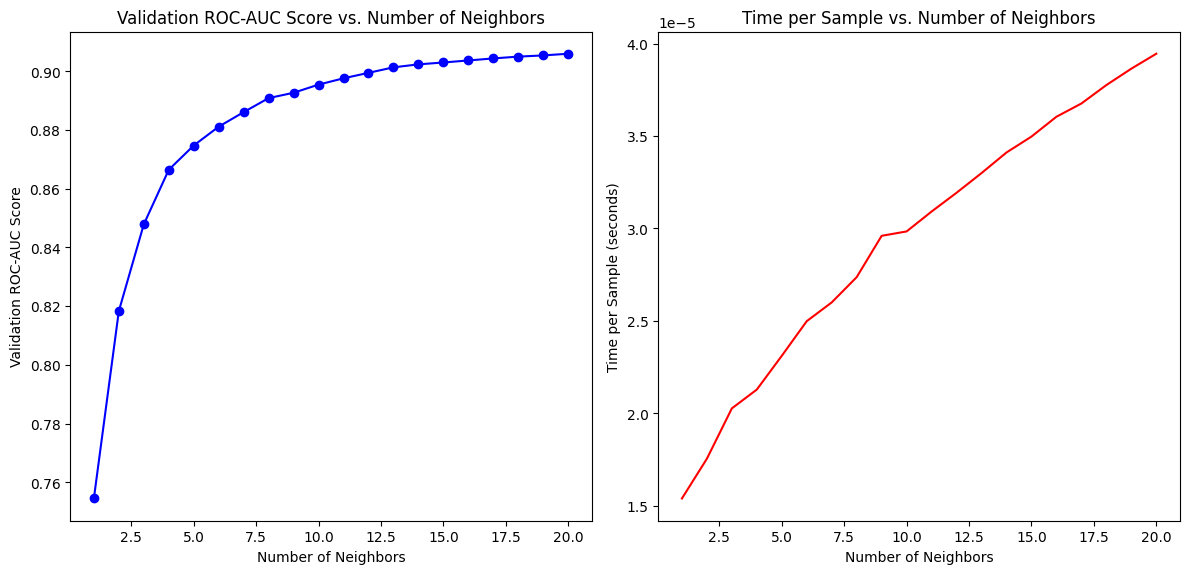

Best n_neighbors: 20 with Validation Accuracy: 0.9060


In [15]:
# Define the hyperparameter range for n_neighbors
n_neighbors_values = range(1, 21)  # Testing for neighbors from 1 to 20

# Store results
n_neighbors_list = []
auc_scores = []
times_per_sample = []

# Perform cross-validation over different values of n_neighbors
for n_neighbors in n_neighbors_values:
    # Same as previous code block.
    model = pipeline(n_neighbors)

    # Measure the time taken for cross-validation
    start_time = time.time()

    # Perform cross-validation and calculate mean validation AUC score.
    # Perform 5-fold cross-validation using the cross_val_score function.
    #
    mean_validation_score = cross_val_score(
        model, X_train, y_train, cv=5, scoring='roc_auc'
    ).mean()

    # Calculate elapsed time and seconds per sample
    elapsed_time = time.time() - start_time
    seconds_per_sample = elapsed_time / len(X_train)

    # Store results for plotting
    n_neighbors_list.append(n_neighbors)
    auc_scores.append(mean_validation_score)
    times_per_sample.append(seconds_per_sample)

    # Print out the validation accuracy, the value of n_neighbors, and the time per sample
    print(f'Validation Accuracy: {mean_validation_score:.4f} with n_neighbors={n_neighbors}')
    print(f'Time taken: {elapsed_time:.2f} seconds, Seconds per sample: {seconds_per_sample:.6f} seconds')

# Plotting results
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Left plot: AUC score vs number of neighbors
axs[0].plot(n_neighbors_list, auc_scores, marker='o', linestyle='-', color='b')
axs[0].set_xlabel('Number of Neighbors')
axs[0].set_ylabel('Validation ROC-AUC Score')
axs[0].set_title('Validation ROC-AUC Score vs. Number of Neighbors')

# Right plot: Time per sample vs number of neighbors
axs[1].plot(n_neighbors_list, times_per_sample, color='r')
axs[1].set_xlabel('Number of Neighbors')
axs[1].set_ylabel('Time per Sample (seconds)')
axs[1].set_title('Time per Sample vs. Number of Neighbors')

plt.tight_layout()
plt.show()

# Output the best hyperparameter
best_n_neighbors = n_neighbors_list[np.argmax(auc_scores)]
best_score = np.max(auc_scores)
print(f'Best n_neighbors: {best_n_neighbors} with Validation Accuracy: {best_score:.4f}')


## Submit to Kaggle

Using the optimal `k` you found, complete the following code to generate predictions on the test data.

Then, submit the `submission.csv` to Kaggle. Please show the TA both the plots generated above and the Kaggle submission result.

In [18]:
# Create a model using the optimal k value
model = pipeline(20)

# Train the model on the training data
model.fit(X_train, y_train)

# For the test data, we also drop unnecessary columns but keep 'id' for the final submission
X_test = test_data.drop(['id', 'CustomerId', 'Surname' ], axis=1)
test_ids = test_data['id']

# Make prediction on test data
y_pred = model.predict(X_test)

# Create the submission DataFrame
submission = pd.DataFrame({'id': test_ids, 'smoking': y_pred})

# Save the submission DataFrame to a CSV file
submission.to_csv('submission.csv', index=False)

print("Submission file 'submission.csv' has been created!")

Submission file 'submission.csv' has been created!
